In [307]:
import pandas as pd
import matplotlib.pyplot as plt 
import glob
import seaborn as sns
from scipy import stats

Please answer the questions below based on the data provided:

Plot daily sales for all 50 weeks.
It looks like there has been a sudden change in daily sales. What date did it occur?
Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value?
Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer (a rigorous statistical analysis is not necessary).
Assume a given day is divided into four dayparts: night (12:00AM - 6:00AM), morning (6:00AM - 12:00PM), afternoon (12:00PM - 6:00PM) and evening (6:00PM - 12:00AM). What is the percentage of sales in each daypart over all 50 weeks?

In [308]:
l = [pd.read_csv(filename) for filename in glob.glob("./data/datasets/*.csv")]

In [309]:
df = pd.concat(l, axis=0)

In [310]:
df['sale_time'] = pd.to_datetime(df['sale_time'])

In [311]:
df.dtypes

sale_time           datetime64[ns]
purchaser_gender            object
dtype: object

In [312]:
df.isna().sum()

sale_time           0
purchaser_gender    0
dtype: int64

Plot daily sales for all 50 weeks.

In [313]:
df_sales_days = df

In [314]:
df_sales_days = df_sales_days.set_index(df_sales_days['sale_time'])

<AxesSubplot:xlabel='sale_time'>

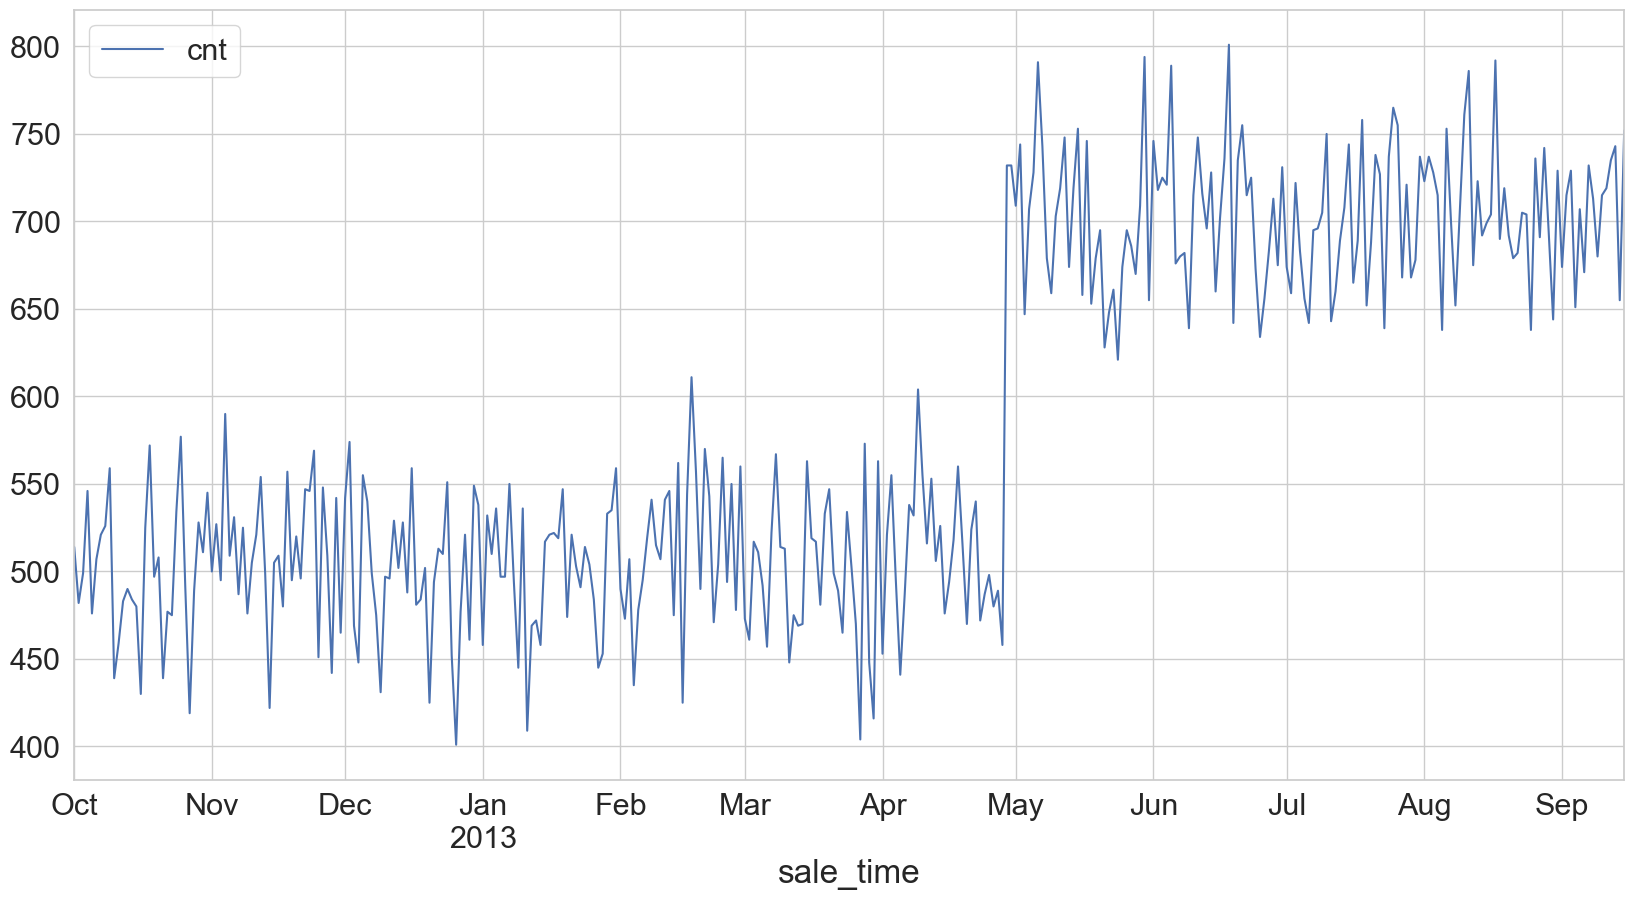

In [315]:
sns.set(
font_scale = 2 ,
style = 'whitegrid' ,
rc = {'figure.figsize' : (20,10)})
df_sales_days.resample(rule='D')\
.agg({'purchaser_gender':'count'}).rename(columns={'purchaser_gender':'cnt'}).plot()

It looks like there has been a sudden change in daily sales. What date did it occur?

Проще всего смотря на график можно увидеть, что значение подскочили от 630, просто отсекаю и смотрю когда впервые появилось значение

In [316]:
tc = df_sales_days.resample(rule='D')\
.agg({'purchaser_gender':'count'}).rename(columns={'purchaser_gender':'cnt'}).reset_index()

In [317]:
tc[tc.cnt>630].head(1)

,sale_time,cnt
210,2013-04-29,732


Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value?

In [318]:
stats.ttest_1samp(tc['cnt'], 732)

Ttest_1sampResult(statistic=-26.367553024439697, pvalue=4.5681432390066193e-85)

Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer (a rigorous statistical analysis is not necessary).

In [319]:
df_ds = df

In [320]:
df_ds['sale_time'] = df_ds['sale_time'].dt.date

In [321]:
df_ds = df_ds.groupby(['sale_time','purchaser_gender']).size().unstack(level=1)

In [322]:
df_ds = df_ds.reset_index()

In [323]:
df_ds

purchaser_gender,sale_time,female,male
0,2012-10-01,413,101
1,2012-10-02,379,103
2,2012-10-03,386,113
3,2012-10-04,432,114
4,2012-10-05,368,108
...,...,...,...
345,2013-09-11,224,495
346,2013-09-12,225,510
347,2013-09-13,206,537
348,2013-09-14,193,462


In [324]:
df_ds['ratio'] = df_ds['male']/df_ds['female']

In [325]:
df_ds['total'] = df_ds['male']+df_ds['female']

In [326]:
df_ds.drop(columns=['male', 'female'], inplace=True)

In [327]:
df_ds

purchaser_gender,sale_time,ratio,total
0,2012-10-01,0.244552,514
1,2012-10-02,0.271768,482
2,2012-10-03,0.292746,499
3,2012-10-04,0.263889,546
4,2012-10-05,0.293478,476
...,...,...,...
345,2013-09-11,2.209821,719
346,2013-09-12,2.266667,735
347,2013-09-13,2.606796,743
348,2013-09-14,2.393782,655


<AxesSubplot:xlabel='sale_time'>

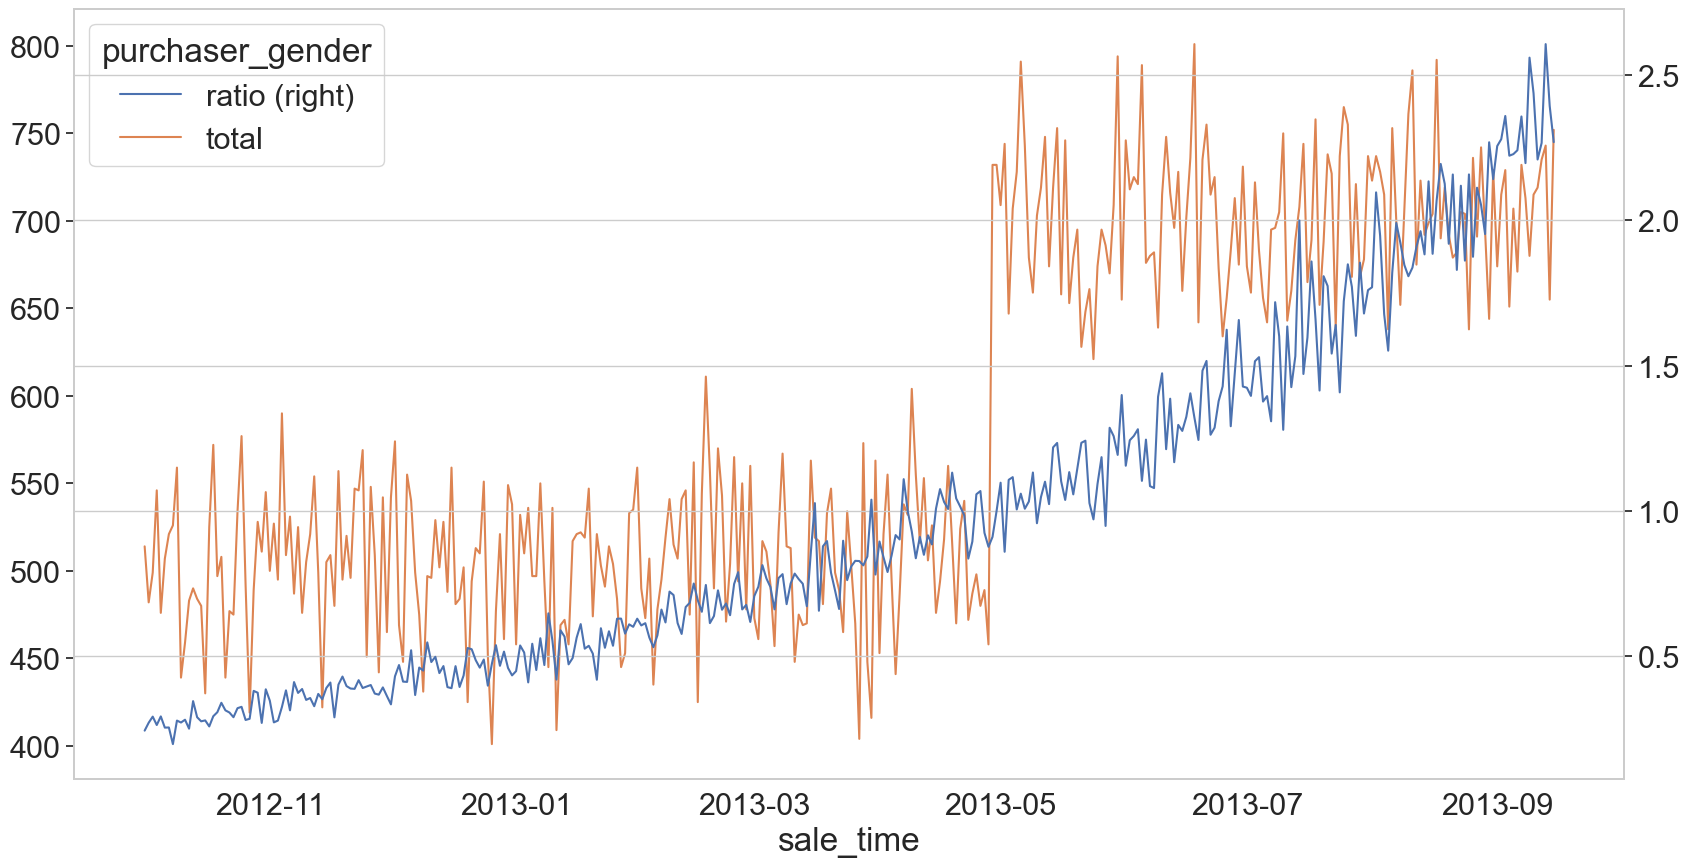

In [328]:
df_ds.index = df_ds['sale_time']
df_ds.drop(columns=['sale_time'], inplace=True)
df_ds.plot(secondary_y = ['ratio'])

по графику видно что увеличение мужской доли не объясняет внезапного вскачка 

Assume a given day is divided into four dayparts: night (12:00AM - 6:00AM), morning (6:00AM to 12:00PM), afternoon (12:00PM to 6:00PM) and evening (6:00PM - 12:00AM). What is the percentage of sales in each daypart over all 50 weeks?

In [330]:
df1 = pd.concat(l, axis=0)

In [331]:
df1

,sale_time,purchaser_gender
0,2012-10-01 01:42:22,female
1,2012-10-01 02:24:53,female
2,2012-10-01 02:25:40,female
3,2012-10-01 02:30:42,female
4,2012-10-01 02:51:32,male
...,...,...
4994,2013-09-15 23:30:51,female
4995,2013-09-15 23:42:02,female
4996,2013-09-15 23:43:24,male
4997,2013-09-15 23:43:32,male


In [332]:
df1['sale_hour']  = pd.to_datetime(df1['sale_time']).dt.ceil('h').dt.hour

In [333]:
df1

,sale_time,purchaser_gender,sale_hour
0,2012-10-01 01:42:22,female,2
1,2012-10-01 02:24:53,female,3
2,2012-10-01 02:25:40,female,3
3,2012-10-01 02:30:42,female,3
4,2012-10-01 02:51:32,male,3
...,...,...,...
4994,2013-09-15 23:30:51,female,0
4995,2013-09-15 23:42:02,female,0
4996,2013-09-15 23:43:24,male,0
4997,2013-09-15 23:43:32,male,0


In [334]:
def day_part(sale_hour):
    if sale_hour > 6 and sale_hour < 12:
        return 'morning'
    if sale_hour > 12 and sale_hour < 18:
        return 'afternoon'
    if sale_hour > 18 and sale_hour < 24:
        return 'evening'
    if sale_hour > -1 and sale_hour < 6:
        return 'night'

In [335]:
df1['day_part'] = df1['sale_hour'].apply(day_part)


In [336]:
df1

,sale_time,purchaser_gender,sale_hour,day_part
0,2012-10-01 01:42:22,female,2,night
1,2012-10-01 02:24:53,female,3,night
2,2012-10-01 02:25:40,female,3,night
3,2012-10-01 02:30:42,female,3,night
4,2012-10-01 02:51:32,male,3,night
...,...,...,...,...
4994,2013-09-15 23:30:51,female,0,night
4995,2013-09-15 23:42:02,female,0,night
4996,2013-09-15 23:43:24,male,0,night
4997,2013-09-15 23:43:32,male,0,night


In [337]:
df_parts = df1.groupby('day_part', as_index=False).agg({'purchaser_gender':'count'})

In [338]:
df_parts['percent'] = df_parts['purchaser_gender']/df_parts['purchaser_gender'].sum()

In [339]:
df_parts

,day_part,purchaser_gender,percent
0,afternoon,68119,0.394595
1,evening,41111,0.238145
2,morning,49833,0.288669
3,night,13567,0.078590
